<a href="https://colab.research.google.com/github/nan-park/section1_project/blob/main/AI_section1_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Topic***

**다음 분기에 어떤 게임을 설계해야 할까**

*   지역에 따라서 선호하는 게임 장르가 다를까
*   연도별 게임의 트렌드가 있을까
*   출고량이 높은 게임에 대한 분석 및 시각화 프로세스 포함

In [78]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
# 파일 다운로드
url = "https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv"
df = pd.read_csv(url)
df.head(10)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,8,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,9,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [4]:
files.upload(); # vgsales.csv

Saving vgsales.csv to vgsales.csv


In [5]:
# 외부 데이터셋(Kaggle) (https://www.kaggle.com/datasets/gregorut/videogamesales)
df_kaggle = pd.read_csv('vgsales.csv')
df_kaggle.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


# **1. 전처리(Preprocessing)**

In [6]:
df_clean = df.copy()
df_clean = df_clean.drop('Unnamed: 0', axis=1)  # 필요 없는 컬럼 삭제
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [7]:
# 결측치 처리(Year, Genre, Publisher)
# Platform: Category로 변경, Year: int로 변경,  Genre: unique 살펴보고 필요하다면 category로 변경, # 각종 Sales: 0을 결측치로 생각하고 제거해야 할지 생각하기/ K, M 값 처리하기
# 중복값 확인

In [8]:
df_clean.Platform.unique()  # Platform 31가지

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [9]:
df_clean.Genre.unique() # Genre 12가지(NaN 미포함)

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter', nan], dtype=object)

In [10]:
# Sales 값 float로 바꾸기
sales = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
# K, M 값 존재
# K = 1,000 / M = 1,000,000
# default M 단위
# K => data/1000. M => data 그대로.

for col in sales:
  df_clean[col] = df_clean[col].astype(str)
  
  k_condition = df_clean[col].str.contains('K')
  df_clean.loc[k_condition, col] = df_clean[k_condition][col].str.replace('K', '').astype(float)/1000
  df_clean[col] = df_clean[col].astype(str)

  m_condition = df_clean[col].str.contains('M')
  df_clean.loc[m_condition, col] = df_clean[m_condition][col].str.replace('M', '')

  df_clean[col] = df_clean[col].astype(float)


In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  float64
 6   EU_Sales     16598 non-null  float64
 7   JP_Sales     16598 non-null  float64
 8   Other_Sales  16598 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.1+ MB


*  **중복값 제거**




In [12]:
df_clean[df_clean.duplicated(keep=False)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8055,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.0,0.02,0.0
9184,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.0,0.02,0.0


In [13]:
df_clean = df_clean.drop_duplicates(ignore_index=True)  # 아예 동일한 중복값 제거

In [14]:
df_clean[df_clean.duplicated(subset=['Name', 'Platform'], keep=False)].sort_values(by='Name') # Year까지 같으면 중복값으로 취급. 합계로 계산하기

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
7346,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,2.11,0.23,0.00,0.22
8717,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0.00,0.01,0.00,0.00
1318,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.80,0.01,0.15
2673,Need for Speed: Most Wanted,PC,2005.0,Racing,Electronic Arts,0.02,0.23,0.00,0.05
12528,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1.00,0.17,0.02,0.10
13807,Need for Speed: Most Wanted,PC,2012.0,Racing,Electronic Arts,0.00,0.06,0.00,0.02
8651,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.00,0.48,0.00,0.00
15704,Sonic the Hedgehog,PS3,2006.0,Platform,Sega,0.41,0.07,0.04,0.66


In [15]:
# Name, Platform 동일한데 Year이 NaN인 데이터는 NaN이 아닌 값에 합치기(index 8651)
drop_index = []
df_duplicated = df_clean[df_clean.duplicated(subset=['Name', 'Platform'], keep=False)]
for index in df_duplicated.index:
  if np.isnan(df_duplicated.loc[index].Year): # isnull() 쓰면 error 발생
    name = df_duplicated.loc[index].Name
    platform = df_duplicated.loc[index].Platform
    df_exist = df_duplicated.query("Platform == @platform and Name == @name") # 존재한다고 전제
    # sum
    for col in sales:
      df_clean.loc[df_exist.index, col] = df_exist[col] + df_duplicated.loc[index][col]
    drop_index.append(index)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [16]:
df_clean = df_clean.drop(drop_index).reset_index(drop=True)

In [17]:
duplicated = df_clean[df_clean.duplicated(subset=['Name', 'Platform'], keep=False)].sort_values(by='Name') # Name, Platform, Year이 같으면 중복으로 취급 -> sum

In [18]:
df_temp = df_clean.copy()

In [19]:
# 중복치 후보 중 Name, Platform, Year이 일치하면 같은 작품으로 생각하고 sales 값을 더한다
for col in sales:
  df_temp.loc[duplicated.index, col] = duplicated.groupby(['Name', 'Platform', 'Year'])[col].transform('sum')

df_temp = df_temp.drop_duplicates().reset_index(drop=True)

In [20]:
df_temp[df_temp.duplicated(subset=['Name', 'Platform'], keep=False)].sort_values(by='Name')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1318,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.80,0.01,0.15
2673,Need for Speed: Most Wanted,PC,2005.0,Racing,Electronic Arts,0.02,0.23,0.00,0.05
12526,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1.00,0.17,0.02,0.10
13805,Need for Speed: Most Wanted,PC,2012.0,Racing,Electronic Arts,0.00,0.06,0.00,0.02


In [21]:
df_clean = df_temp

*  **Year 이상치 수정**

In [22]:
df_clean.describe() # Year이 0인 값이 존재

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16326.000000,16595.000000,16595.000000,16595.000000,16595.000000
mean,1994.241455,0.264715,0.146679,0.077795,0.048072
std,155.081855,0.816749,0.505397,0.309317,0.188604
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,41.490000,29.020000,10.220000,10.570000


In [23]:
# df_clean[df_clean.Year<1900]
df_clean.loc[df_clean.Year==0, 'Year'] = np.nan # Year==0인 값은 결측치로 간주

index_out = df_clean[df_clean.Year<1900].index  # 확인용

df_clean.loc[df_clean.Year<10, 'Year'] = ('200' + df_clean[df_clean.Year<10].Year.astype(str)).astype(float)
df_clean.loc[df_clean.Year<20, 'Year'] = ('20'+ df_clean[df_clean.Year<20].Year.astype(str)).astype(float)
df_clean.loc[df_clean.Year<1900, 'Year'] = ('19' + df_clean[df_clean.Year<1900].Year.astype(str)).astype(float)

df_clean.iloc[index_out].head(10)

# NaN 값 마저 없앤 다음에 int로 바꿔주기

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
74,Age of Empires III: Complete Collection,PC,2009.0,Strategy,Microsoft Game Studios,0.01,0.12,0.00,0.03
81,Treasures of the Deep,PS,1997.0,Action,Namco Bandai Games,0.10,0.07,0.00,0.01
213,NASCAR Unleashed,PS3,2011.0,Racing,Activision,0.09,0.00,0.00,0.01
304,Kung Fu Panda: Showdown of Legendary Legends,PS3,2015.0,Action,Little Orbit,0.00,0.02,0.00,0.00
768,NASCAR Thunder 2004,PS2,2003.0,Racing,Electronic Arts,0.53,0.41,0.00,0.14
906,Mini-Yonku Shining Scorpion: Let's & Go!!,SNES,1996.0,Racing,ASCII Entertainment,0.00,0.00,0.90,0.00
1015,Wolfenstein,PC,2009.0,Shooter,Activision,0.01,0.03,0.00,0.01
1220,Ratchet & Clank: Going Commando,PS2,2003.0,Platform,Sony Computer Entertainment,1.44,0.83,0.26,0.25
1364,LEGO Star Wars II: The Original Trilogy,PS2,2006.0,Action,LucasArts,1.85,0.64,0.01,0.19
1409,Rogue Warrior,PS3,2009.0,Shooter,Bethesda Softworks,0.11,0.02,0.00,0.01


*  **결측치 처리**



In [24]:
df_clean.info() # Year, Genre, Publisher

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16595 entries, 0 to 16594
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16595 non-null  object 
 1   Platform     16595 non-null  object 
 2   Year         16323 non-null  float64
 3   Genre        16545 non-null  object 
 4   Publisher    16538 non-null  object 
 5   NA_Sales     16595 non-null  float64
 6   EU_Sales     16595 non-null  float64
 7   JP_Sales     16595 non-null  float64
 8   Other_Sales  16595 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.1+ MB




1.  장르(Genre) 결측치


In [25]:
# Genre 결측치 채우기
genre_missing = df_clean[df_clean.Genre.isnull()] # 50개

In [26]:
# df_kaggle 외부 데이터에서 장르 결측치 채우기
name_list = list(genre_missing.Name)
kaggle_genre = df_kaggle[df_kaggle.Name.isin(name_list)]
kaggle_genre.duplicated(subset=['Name']).sum(), kaggle_genre.duplicated(subset=['Name', 'Genre']).sum() # Name 같으면 Genre도 동일함

(48, 48)

In [27]:
drop_index = kaggle_genre[kaggle_genre.duplicated(subset=['Name', 'Genre'])==True].index
kaggle_genre = kaggle_genre.drop(drop_index)

In [28]:
for name in name_list:
  df_clean.loc[df_clean.Name==name, 'Genre'] = kaggle_genre[kaggle_genre.Name==name].Genre.values[0]

In [29]:
df_clean.iloc[genre_missing.index].head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
50,Ape Escape: On the Loose,PSP,2005.0,Platform,Sony Computer Entertainment,0.52,0.01,0.12,0.05
408,NBA Ballers,XB,2004.0,Sports,Midway Games,0.37,0.11,0.00,0.02
1328,NFL Street,XB,2004.0,Sports,Electronic Arts,0.49,0.15,0.00,0.02
1582,SingStar Singalong With Disney,PS2,2008.0,Misc,Sony Computer Entertainment,0.00,0.04,0.00,0.57
1971,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,Nintendo,5.17,4.05,4.34,0.79


2. Publisher 결측치

In [30]:
df_temp = df_clean.copy() # 임시 저장해서 나중에 df_clean에 덮어씌우기

In [31]:
# Publisher 결측치 채우기
# Name이 같다면 같은 Publisher로 취급한다.
missing_rows = df_temp[df_temp.Publisher.isnull()]
name_list = missing_rows.Name
len(missing_rows), df_temp[df_temp.Name.isin(name_list)].shape[0]   # 일부는 name과 매치시켜 Publisher 채울 수 있음

(57, 65)

In [32]:
for name in name_list:
  duplicates = df_temp[df_temp.Name==name]
  null = duplicates[duplicates.isnull().any(axis=1)]
  notnull = duplicates[duplicates.notnull().all(axis=1)]
  if len(notnull) > 0 :  # publisher 값 존재
    publisher = notnull.Publisher.values[0]  # Publisher 모두 같다고 전제
    df_temp.loc[null.index, 'Publisher'] = publisher

In [33]:
df_temp[df_temp.Publisher.isnull()].head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
272,UK Truck Simulator,PC,2010.0,Simulation,NaN,0.00,0.03,0.0,0.00
1313,All Grown Up!: Game Boy Advance Video Volume 1,GBA,2004.0,Misc,NaN,0.17,0.06,0.0,0.00
1560,Teenage Mutant Ninja Turtles: Game Boy Advance...,GBA,2004.0,Misc,NaN,0.12,0.04,0.0,0.00
1789,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.16,0.06,0.0,0.00
1961,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.0,0.01


In [34]:
# 나머지 Publisher 결측치는 Unknown으로 대체  (체크) Sales 값 큰 것도 많은데 Unknown으로 다 처리해도 될까?
df_temp.loc[df_temp.Publisher.isnull(), 'Publisher'] = df_temp.Publisher.fillna("Unknown")
df_temp.Publisher.isnull().sum()

0

In [35]:
df_clean = df_temp

3. Year 결측치

In [36]:
# Year 결측치 처리
missing_rows = df_clean[df_clean.Year.isnull()]
missing_rows.shape[0] # 272개

272

In [37]:
df_clean['Global_Sales'] = df_clean['NA_Sales'] + df_clean['EU_Sales'] + df_clean['JP_Sales'] + df_clean['Other_Sales']
df_clean[df_clean.Year.isnull()].describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,0.0,272.000000,272.000000,272.000000,272.000000,272.000000
mean,NaN,0.219044,0.090331,0.025368,0.032169,0.366912
std,NaN,0.424994,0.207973,0.090312,0.075765,0.615371
min,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,NaN,0.010000,0.000000,0.000000,0.000000,0.050000
50%,NaN,0.090000,0.020000,0.000000,0.010000,0.160000
75%,NaN,0.240000,0.092500,0.000000,0.030000,0.372500
max,NaN,4.260000,2.360000,0.770000,0.710000,5.240000


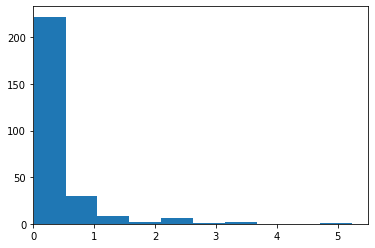

In [38]:
plt.hist(df_clean[df_clean.Year.isnull()].Global_Sales)
plt.xlim((0, 5.5))
plt.show()

In [39]:
year_null = df_clean[df_clean.Year.isnull()]
len(year_null[year_null.Global_Sales>1])

22

In [40]:
high_sales = year_null[year_null.Global_Sales>1]  # Global Sales가 1 이상인 것만 따로 찾아서 작성하기(구글)
high_sales

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48
2130,Call of Duty 3,Wii,NaN,Shooter,Activision,1.19,0.84,0.00,0.23,2.26
3031,Donkey Kong Land III,GB,NaN,Platform,Nintendo,0.68,0.31,0.00,0.04,1.03
3347,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
3562,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,Unknown,1.57,1.02,0.00,0.41,3.00
3942,Legacy of Kain: Soul Reaver,PS,NaN,Action,Eidos Interactive,0.58,0.40,0.00,0.07,1.05
4181,Rock Band,Wii,NaN,Misc,MTV Games,1.35,0.56,0.00,0.20,2.11
5674,Hitman 2: Silent Assassin,XB,NaN,Action,Eidos Interactive,0.76,0.38,0.00,0.05,1.19
5720,Adventure,2600,NaN,Adventure,Atari,1.21,0.08,0.00,0.01,1.30
6949,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.24


In [41]:
index_year_dic = {31: 2009.0, 2130: 2006.0, 3031: 1997.0, 3347: 2008.0, 3562: 2005.0, 3942: 1999.0, 4181: 2009.0, 5674: 2002.0, 5720: 1980.0, 6949: 2003.0, 8529: 2008.0, 9237: 2011.0, 9955: 2008.0, 10773: 2012.0, 10962: 2003.0, 11306: 1998.0, 12855: 2007.0, 12983: 2010.0, 13324: 2001.0, 13749: 2002.0, 14762: 1977.0, 16272: 1978.0}
index = list(high_sales.index)
for i in index:
  df_clean.loc[i, 'Year'] = index_year_dic[i]
df_clean.loc[index].head() # 잘 대체된 것을 확인

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
31,Rock Band,X360,2009.0,Misc,Electronic Arts,1.93,0.34,0.0,0.21,2.48
2130,Call of Duty 3,Wii,2006.0,Shooter,Activision,1.19,0.84,0.0,0.23,2.26
3031,Donkey Kong Land III,GB,1997.0,Platform,Nintendo,0.68,0.31,0.0,0.04,1.03
3347,LEGO Batman: The Videogame,Wii,2008.0,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.0,0.29,3.17
3562,wwe Smackdown vs. Raw 2006,PS2,2005.0,Fighting,Unknown,1.57,1.02,0.0,0.41,3.00


In [42]:
# 이외의 Year 결측치는 제거
drop_index = df_clean[df_clean.Year.isnull()].index
df_clean = df_clean.drop(drop_index).reset_index(drop=True)

In [43]:
df_clean.isnull().sum() # 결측치 제거 완료

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

2016년 이후의 연도(2017~2020) 자료는 이상치로, 실제 게임의 출시 연도와 다르므로 수정해준다.

In [44]:
df_clean[df_clean.Year > 2016]
# Imagine: Makeup Artist(DS)	: 2009
# Phantasy Star Online 2 Episode 4: Deluxe Package(PS4)	: 2016
# Brothers Conflict: Precious Baby(PSV) : 2016
# Phantasy Star Online 2 Episode 4: Deluxe Package(PSV)	: 2016
edit_index = df_clean[df_clean.Year > 2016].index
edit_year = [2009.0, 2016.0, 2016.0, 2016.0]
for i in range(len(edit_index)):
  df_clean.loc[edit_index[i], 'Year'] = edit_year[i]
df_clean.loc[edit_index]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5230,Brothers Conflict: Precious Baby,PSV,2009.0,Action,Idea Factory,0.00,0.0,0.01,0.00,0.01
6806,Imagine: Makeup Artist,DS,2016.0,Simulation,Ubisoft,0.27,0.0,0.00,0.02,0.29
9966,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2016.0,Role-Playing,Sega,0.00,0.0,0.03,0.00,0.03
14999,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2016.0,Role-Playing,Sega,0.00,0.0,0.01,0.00,0.01


* **Year: 정수형으로 바꾸기**

In [45]:
df_clean['Year'] = df_clean.Year.astype(int)
df_clean.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [46]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16345 entries, 0 to 16344
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16345 non-null  object 
 1   Platform      16345 non-null  object 
 2   Year          16345 non-null  int64  
 3   Genre         16345 non-null  object 
 4   Publisher     16345 non-null  object 
 5   NA_Sales      16345 non-null  float64
 6   EU_Sales      16345 non-null  float64
 7   JP_Sales      16345 non-null  float64
 8   Other_Sales   16345 non-null  float64
 9   Global_Sales  16345 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.2+ MB


In [47]:
# 휴대용(portable), 거치용(home), PC로 나누기
portable = ['DS', '3DS', 'PSP', 'GB', 'GBA', 'PSV', 'WS', 'GG', 'WiiU']
home = ['Wii', 'GC', 'XB', 'X360', 'PS', 'PS2', 'PS3', 'PS4', '2600', 'NES', 'SNES', 'DC', 'N64', 'XOne', 'GEN', 'SCD', 'NG', 'TG16', '3DO', 'PCFX', 'SAT']
pc = ['PC']

In [48]:
df_clean['Device_Type'] = ""
df_clean.loc[df_clean.Platform.isin(portable), 'Device_Type'] = 'Portable'
df_clean.loc[df_clean.Platform.isin(home), 'Device_Type'] = 'Home'
df_clean.loc[df_clean.Platform.isin(pc), 'Device_Type'] = 'PC'
df_clean.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Device_Type
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,Portable
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,Home
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,Portable
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,Portable
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,Home
5,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00,0.14,Portable
6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0.00,0.00,0.03,PC
7,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,0.07,0.00,0.11,0.01,0.19,Portable
8,Imabikisou,PS3,2007,Adventure,Sega,0.00,0.00,0.04,0.00,0.04,Home
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01,0.08,Home


# **2. 데이터 분석(Data Analysis)**

데이터 분석을 쉽게 하기 위해 새로운 컬럼을 생성한다.
<br>
위에서 sales 값의 합계 Global_Sales를 포함하여, 휴대용/거치용/PC 카테고리, 매출 순위, 

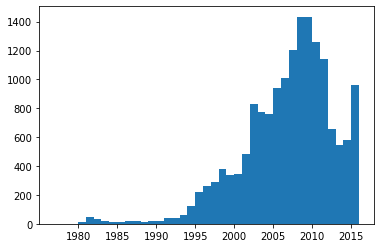

In [77]:
bins = (2016-1977)
plt.hist(df_clean.Year, bins=bins)
plt.show()

In [50]:
df_clean.Year.describe()

count    16345.000000
mean      2006.399816
std          5.838199
min       1977.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: Year, dtype: float64

1. 지역에 따라서 선호하는 게임 장르가 다를까
<br>
지역별, 장르별 groupby

In [51]:
# 장르별 지역의 출고량 비교
sales_include_sum = sales + ['Global_Sales']  # 기존 sales에서 전체 Global_Sales 포함한 리스트
group_data = df_clean.groupby('Genre')[sales_include_sum]
group_sum = group_data.sum().T
group_sum

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,869.04,105.42,222.31,407.46,446.62,122.01,357.53,326.50,579.28,181.78,675.75,67.89
EU_Sales,519.91,64.05,101.02,215.19,201.43,50.53,236.78,187.58,312.23,113.20,374.51,44.94
JP_Sales,158.66,52.01,87.15,106.67,130.65,56.68,56.61,350.29,38.18,63.54,134.81,48.90
Other_Sales,185.97,16.78,36.60,75.00,51.54,12.47,76.84,59.38,102.40,31.36,133.97,11.23
Global_Sales,1733.58,238.26,447.08,804.32,830.24,241.69,727.76,923.75,1032.09,389.88,1319.04,172.96


In [52]:
group_data.size() # 장르별 데이터 개수

Genre
Action          3260
Adventure       1278
Fighting         837
Misc            1714
Platform         876
Puzzle           571
Racing          1227
Role-Playing    1471
Shooter         1284
Simulation       851
Sports          2306
Strategy         670
dtype: int64

In [53]:
genre_list = list(group_sum.columns) # 장르 리스트

ratio = group_sum.copy()  # index: 지역, column: 장르
ratio['Sum'] = 0

# for genre in genre_list:
#   for region in sales_include_sum:
#     ratio.loc[region, 'Sum'] += ratio.loc[region, genre]
ratio['Sum'] = ratio.sum(axis=1)  # 위의 코드와 동일한 기능


# for region in sales:
#   ratio[region] = group_sum.loc[genre_list, region] / group_sum['Global_Sales'][genre_list] * 100
for region in sales_include_sum:
  ratio.loc[region, genre_list] = ratio.loc[region, genre_list] / ratio.loc[region, 'Sum'] * 100

sales_by_region = ratio['Sum']  # 지역별 출고량 합계 따로 저장
ratio = ratio.drop('Sum', axis=1)

ratio # 지역별 장르 비율

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,19.924844,2.417008,5.096994,9.342006,10.239844,2.797374,8.197240,7.485802,13.281395,4.167746,15.493203,1.556542
EU_Sales,21.471729,2.645197,4.172018,8.887118,8.318844,2.086835,9.778762,7.746854,12.894766,4.675039,15.466864,1.855974
JP_Sales,12.355254,4.050150,6.786590,8.306662,10.174045,4.413815,4.408364,27.277966,2.973173,4.948020,10.497995,3.807966
Other_Sales,23.435492,2.114575,4.612244,9.451319,6.494947,1.571439,9.683192,7.482925,12.904201,3.951912,16.882577,1.415178
Global_Sales,19.564930,2.688968,5.045679,9.077438,9.369967,2.727678,8.213393,10.425307,11.648017,4.400129,14.886493,1.952001


In [54]:
# Global_Sales 기준으로 비율이 큰 순서대로 배열하기
ratio_sort = ratio.sort_values('Global_Sales',axis=1, ascending=False)
genre_list_sort = list(ratio_sort.columns)
ratio_sort

Genre,Action,Sports,Shooter,Role-Playing,Platform,Misc,Racing,Fighting,Simulation,Puzzle,Adventure,Strategy
NA_Sales,19.924844,15.493203,13.281395,7.485802,10.239844,9.342006,8.197240,5.096994,4.167746,2.797374,2.417008,1.556542
EU_Sales,21.471729,15.466864,12.894766,7.746854,8.318844,8.887118,9.778762,4.172018,4.675039,2.086835,2.645197,1.855974
JP_Sales,12.355254,10.497995,2.973173,27.277966,10.174045,8.306662,4.408364,6.786590,4.948020,4.413815,4.050150,3.807966
Other_Sales,23.435492,16.882577,12.904201,7.482925,6.494947,9.451319,9.683192,4.612244,3.951912,1.571439,2.114575,1.415178
Global_Sales,19.564930,14.886493,11.648017,10.425307,9.369967,9.077438,8.213393,5.045679,4.400129,2.727678,2.688968,1.952001


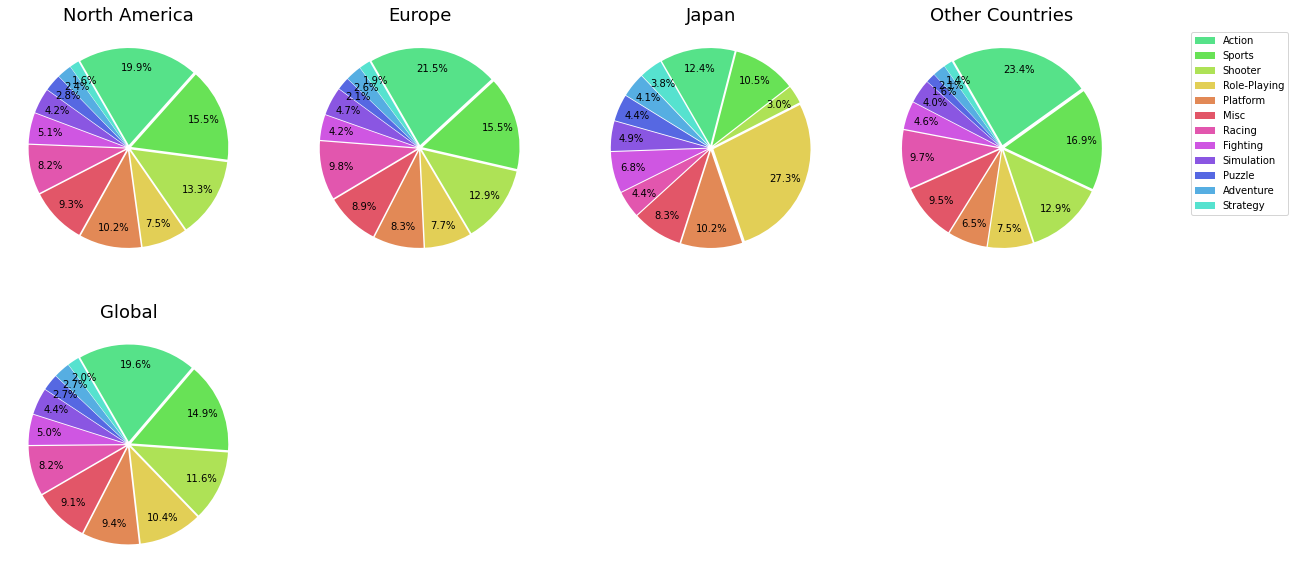

In [55]:
titles = ['North America', 'Europe', 'Japan', 'Other Countries', 'Global']
explode = [0.03] * len(genre_list)
colors = ['#56E2CF', '#56AEE2', '#5668E2', '#8A56E2', '#CF56E2', '#E256AE', '#E25668', '#E28956', '#E2CF56', '#AEE256', '#68E256', '#56E289']
colors.reverse()
figure, axis = plt.subplots(2, 4, figsize=(20, 10))
for i in range(len(sales_include_sum)):  # ['NA', 'EU', 'JP', 'Other', 'Global']
  axis[i//4, i%4].set_title(titles[i], fontsize=18)
  ratio_in_region = list(ratio_sort.loc[sales_include_sum[i]])
  # (체크) 크기 큰 순서대로 바꾸기
  
  # for i in range(len(ratio_in_region)):
  #   if ratio_in_region[i] > 10:
  #     explode[i] = 0.1
  axis[i//4, i%4].pie(ratio_in_region, autopct='%.1f%%', startangle=120, explode=explode, colors=colors, counterclock=False, pctdistance=0.8)
  if i==3:
    axis[i//4, i%4].legend(genre_list_sort,loc='upper right', bbox_to_anchor=(1.7, 1, 0, 0))

figure.delaxes(axis[1,1])
figure.delaxes(axis[1,2])
figure.delaxes(axis[1,3])

plt.show()

전세계적으로 보았을 때 Action이 1위, 그 뒤로 Sports, Shooter, Role-Playing, Platform 순으로 인기가 많다.<br>
지역에 따라서 그 순위는 많이 변하진 않으나, Role-Playing과 Platform 장르의 경우 지역별로 조금씩 순서가 뒤바뀌는 경우가 종종 있다.<br>
특히 일본의 경우 Role-Playing 장르가 압도적인 1위를 기록하고, 다른 지역에서는 상위권인 Shooter 장르가 큰 인기를 끌지못한 것을 볼 수 있다.<br>

In [56]:
df_clean = df_clean.sort_values('Global_Sales', ascending=False).reset_index(drop=True) # 전체 출고량 Rank 순서대로(내림차순) index=Rank

In [57]:
group_sum.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,869.04,105.42,222.31,407.46,446.62,122.01,357.53,326.50,579.28,181.78,675.75,67.89
EU_Sales,519.91,64.05,101.02,215.19,201.43,50.53,236.78,187.58,312.23,113.20,374.51,44.94
JP_Sales,158.66,52.01,87.15,106.67,130.65,56.68,56.61,350.29,38.18,63.54,134.81,48.90
Other_Sales,185.97,16.78,36.60,75.00,51.54,12.47,76.84,59.38,102.40,31.36,133.97,11.23
Global_Sales,1733.58,238.26,447.08,804.32,830.24,241.69,727.76,923.75,1032.09,389.88,1319.04,172.96


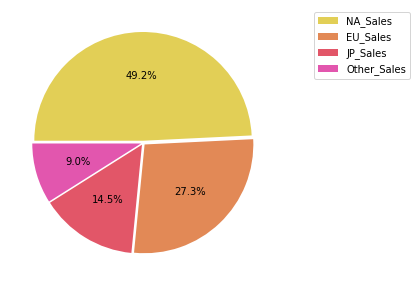

In [58]:
# 출고량 지역별 비율
sales_by_region
explode = [0.02] * 4
colors_four = ['#FFC000', '#8FD9B6', '#D395D0', '#FF9999']
ratio_sales = sales_by_region / sales_by_region['Global_Sales'] * 100
plt.figure(figsize=(5, 5))
plt.pie(ratio_sales[sales], autopct='%.1f%%', explode=explode, colors=colors[3:7], counterclock=False, startangle=180)
plt.legend(sales, loc='upper right', bbox_to_anchor=(1.5, 1, 0, 0))
plt.show()

위의 그래프를 봤을 때 전체 출고량의 절반 정도를 북아메리카가 차지하고 있다.<br>
글로벌 시장에 북아메리카 시장의 영향이 클 것을 예상할 수 있다.<br>
글로벌 시장을 노리려면 북아메리카, 유럽의 보편적인 장르 선호도를 따르는 것이 합리적으로 보인다.

In [59]:
group_sum

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,869.04,105.42,222.31,407.46,446.62,122.01,357.53,326.50,579.28,181.78,675.75,67.89
EU_Sales,519.91,64.05,101.02,215.19,201.43,50.53,236.78,187.58,312.23,113.20,374.51,44.94
JP_Sales,158.66,52.01,87.15,106.67,130.65,56.68,56.61,350.29,38.18,63.54,134.81,48.90
Other_Sales,185.97,16.78,36.60,75.00,51.54,12.47,76.84,59.38,102.40,31.36,133.97,11.23
Global_Sales,1733.58,238.26,447.08,804.32,830.24,241.69,727.76,923.75,1032.09,389.88,1319.04,172.96


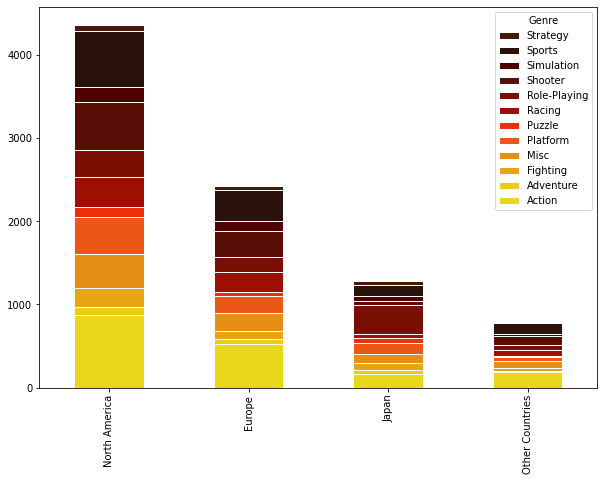

In [60]:
# 지역별 장르 Stacked bar
colors_heat = ['#E8D819', '#EFCA13', '#E7A514', '#E58F15', '#EC5617', '#EC2F0E', '#9E0F01', '#790F00', '#590D07', '#500003', '#291209', '#461909']  # (체크) 컬러 고민해보기
group_sum_part = group_sum.drop('Global_Sales')
group_sum_part.index = titles[:-1]
group_sum_part.plot.bar(stacked=True, figsize=(10,7), legend='reverse', color=colors_heat, edgecolor='w', linewidth=1);
plt.show()

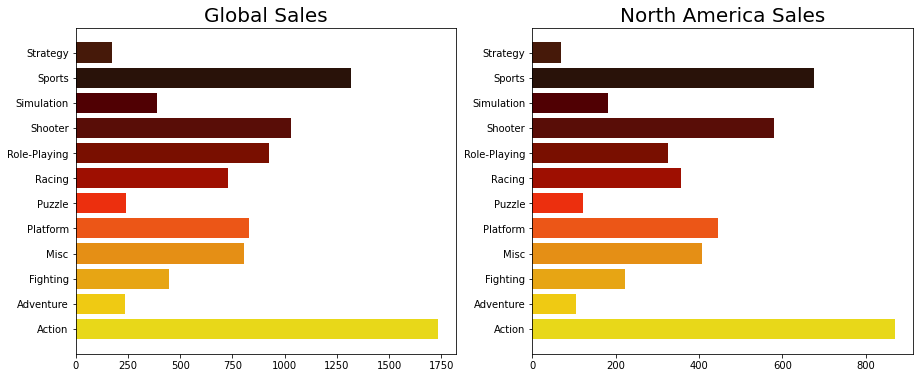

In [61]:
# Global Sales / North America
y = np.arange(len(genre_list))
values_global = np.array(group_sum.loc['Global_Sales'])
values_north_america = np.array(group_sum.loc['NA_Sales'])
genre_list

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].set_title('Global Sales', fontsize=20)
ax[0].barh(y, values_global, color=colors_heat)
ax[0].set_yticks(y)
ax[0].set_yticklabels(genre_list)

ax[1].set_title('North America Sales', fontsize=20)
ax[1].barh(y, values_north_america, color=colors_heat)
ax[1].set_yticks(y)
ax[1].set_yticklabels(genre_list)
plt.show()

Global Sales와 North America의 장르별 출고량을 보았을 때, 단위의 차이만 있을 뿐 상대적인 양은 거의 동일한 것을 볼 수 있다.<br>
Global Sales의 절반을 North America가 차지하는 만큼, 큰 영향을 미침을 알 수 있다.

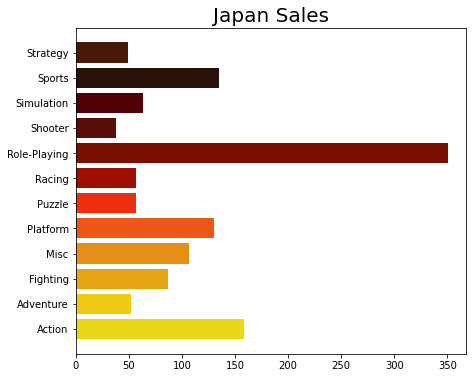

In [62]:
# Japan
y = np.arange(len(genre_list))
values = np.array(group_sum.loc['JP_Sales'])
genre_list

plt.figure(figsize=(7, 6))
plt.title('Japan Sales', fontsize=20)
plt.barh(y, values, color=colors_heat)
plt.yticks(y, genre_list)
plt.show()

일본은 이례적으로 Role-Playing 장르가 큰 인기를 끌고 있다.

In [63]:
# 유독 일본만 특이한 장르 선호도를 보인다. 왜일까? 근데 그냥 자국의 게임 회사에서 나온거라 출고량이 높은 걸수도..?
df_clean.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Device_Type
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Home
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Home
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,Home
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Home
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,Portable
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,Portable
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,Portable
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01,Home
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61,Home
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,Home


In [64]:
df_clean.sort_values("JP_Sales", ascending=False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Device_Type
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,Portable
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.09,Portable
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Home
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,Portable
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.35,Portable
26,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32,Portable
25,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.84,Portable
41,Animal Crossing: Wild World,DS,2005,Simulation,Nintendo,2.55,3.52,5.33,0.88,12.28,Portable
27,Brain Age 2: More Training in Minutes a Day,DS,2005,Puzzle,Nintendo,3.44,5.36,5.32,1.18,15.30,Portable
214,Monster Hunter Freedom 3,PSP,2010,Role-Playing,Capcom,0.00,0.00,4.87,0.00,4.87,Portable


index가 글로벌 시장 기준 순위(0부터 시작)인데, 순위가 조금씩 차이가 나는 것을 확인할 수 있다.<br>
global sales와 jp sales의 상관관계를 한 번 알아봐야 할 것 같다.


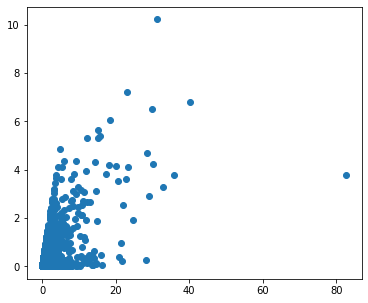

In [65]:
plt.figure(figsize=(6, 5))
plt.scatter(df_clean.Global_Sales, df_clean.JP_Sales) # 사실 단위 차이가 커서 이걸로 제대로 측정이 되는건지는..
plt.show()

전세계적으로는 인기인데 일본에서는 아니거나, 전세계적으로는 인기 없는데 일본에서는 인기 있는 게임을 파악할 수 있을까?<br>
cluster를 해보면 그게 나올까..? <br>
NA와 JP을 대상으로 K-Means clustering을 한 번 해보자.(Global은 JP 포함이라..)<br>
'둘이 많이 다르다'를 보려는 게 아니라, 조금 눈에 띄는 작품을 찾아보고 싶은 것

In [99]:
# 표준화
scaler = StandardScaler()
Z = scaler.fit_transform(df_clean.select_dtypes(include=['float'])) # Sales 표준화
df_standard = df_clean.copy()
for i in range(len(sales_include_sum)):
  df_standard.loc[:, sales_include_sum[i]] = Z[:, i]
df_standard.head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Device_Type
0,Wii Sports,Wii,2006,Sports,Nintendo,50.117244,56.724419,11.854877,44.278935,52.478136,Home
1,Super Mario Bros.,NES,1985,Platform,Nintendo,35.029728,6.742558,21.617700,3.797807,25.344586,Home
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,18.945294,25.014229,11.919106,17.168687,22.529081,Home
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,18.823718,21.340248,10.281264,15.326243,20.722306,Home
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,13.377137,17.175093,32.568762,5.008556,19.688039,Portable


In [195]:
df_test = df_clean.sort_values('JP_Sales', ascending=False).reset_index()
df_test.rename(columns = {'index': 'Global_Rank'}, inplace=True)
df_test.index.name = "JP_Rank"
df_japan_high = df_test[(df_test.Global_Rank-df_test.index)>100]
df_japan_high.head(20)  # 그 뒤로는 100위 정도의 차이가 큰 차이는 아니라고 생각함

,Global_Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Device_Type
JP_Rank,,,,,,,,,,,,
9,214,Monster Hunter Freedom 3,PSP,2010,Role-Playing,Capcom,0.00,0.00,4.87,0.00,4.87,Portable
12,149,Dragon Quest IX: Sentinels of the Starry Skies,DS,2009,Role-Playing,Nintendo,0.66,0.69,4.35,0.15,5.85,Portable
17,161,Monster Hunter Freedom Unite,PSP,2008,Role-Playing,Capcom,0.47,0.57,4.13,0.34,5.51,Portable
19,243,Dragon Quest VII: Warriors of Eden,PS,2000,Role-Playing,Enix Corporation,0.20,0.14,4.10,0.02,4.46,Home
24,312,Dragon Warrior III,NES,1988,Role-Playing,Enix Corporation,0.10,0.00,3.77,0.00,3.87,Home
26,338,Friend Collection,DS,2009,Misc,Nintendo,0.00,0.00,3.67,0.00,3.67,Portable
28,180,Dragon Quest VIII: Journey of the Cursed King,PS2,2004,Role-Playing,Square Enix,0.65,0.75,3.61,0.20,5.21,Home
31,385,Monster Hunter 4,3DS,2013,Role-Playing,Capcom,0.00,0.00,3.44,0.00,3.44,Portable
34,425,Dragon Quest VI: Maboroshi no Daichi,SNES,1995,Role-Playing,Enix Corporation,0.00,0.00,3.19,0.00,3.19,Home


예를 들어 몬헌이나, 드래곤 퀘스트, 파이널 판타지 정도(셋 다 롤플레잉)<br>
(드래곤 워리어는 드래곤 퀘스트의 북미 버전 이름)<br>



Friend Collection은 일본에서 독점 출시된 거라 특이케이스다.

In [201]:
df_global_high = df_test[(df_test.index-df_test.Global_Rank)>100].sort_values('Global_Sales', ascending=False)
df_global_high.head(10)

,Global_Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Device_Type
JP_Rank,,,,,,,,,,,,
1103,9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,Home
1266,15,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82,Home
248,16,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39,Home
728,17,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,Home
3299,23,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38,Home
604,24,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15,Home
2062,29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76,Home
2403,31,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64,Home
848,33,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24,Home


일본에선 그렇게 순위가 높지 않은데 글로벌로는 큰 인기를 끈 것들.<br>
덕 헌트, 키넥트 어드벤처, GTA5, 콜 오브 듀티:블랙옵스 등이 높은 순위를 차지한다.<br>

In [197]:
df_japan_high.groupby('Genre').sum()[sales_include_sum].T

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,81.49,22.18,32.25,36.74,56.28,26.38,26.07,100.63,27.93,26.44,43.14,15.01
EU_Sales,45.27,9.91,15.00,16.54,17.97,11.75,14.31,45.07,15.64,11.76,33.12,9.59
JP_Sales,113.87,47.62,64.84,84.31,59.28,38.23,21.40,267.01,23.43,45.97,109.89,47.75
Other_Sales,14.45,3.05,7.11,4.76,4.99,3.24,3.88,18.34,4.52,4.41,10.27,3.19
Global_Sales,255.08,82.76,119.20,142.35,138.52,79.60,65.66,431.05,71.52,88.58,196.42,75.54


In [156]:
# KMeans Clustering(Global, JP)
# elbow method
sse = {}

for k in range(1, 10):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(Z[:, [0, 2]])  # NA, JP
  sse[k] = kmeans.inertia_

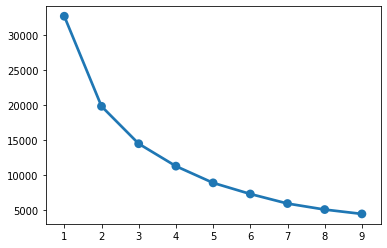

In [157]:
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()  # 딱히 최적의 k가.. 5 정도?

In [158]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(Z[:, [0, 2]])
cluster_labels = kmeans.labels_ # 각 행마다 label 지정

df_standard = df_standard.assign(Cluster = cluster_labels)

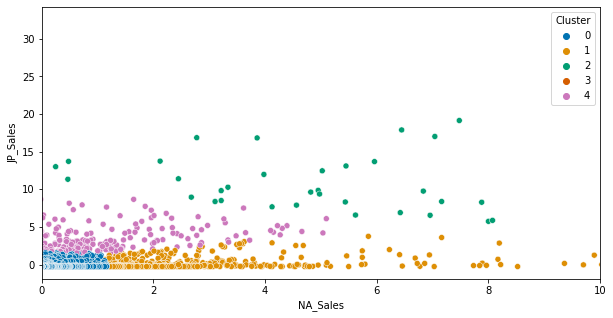

In [159]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_standard.NA_Sales, y=df_standard.JP_Sales, hue=df_standard.Cluster, palette='colorblind')
plt.xlim(0, 10)
plt.show()

**(주의)** 북미, 일본 출고량만을 기준으로 클러스터를 나눈 것임.<br>
cluster 0 : 둘 다 평균보다 낮음<br>
**cluster 1: 북미에선 성공했는데 일본에선 평균**<br>
cluster 2: 둘다 꽤 성공인데 일본에서 특히 대성공<br>
cluster 3: 둘 다 대성공<br>
**cluster 4: 북미에선 평균이었는데 일본에서 꽤 성공**

보통 북미에서 성공하면 일본의 성공도 따라오는 편인 것 같다.<br>
북미에서 성공했는데 일본에선 별로인 건 별로 없는 듯.<br>
대신 북미에서는 평균인데 일본에서 특히 성공한 케이스는 있다.

다만 Cluster을 맹신하면 안될 것 같다. 다른 방식으로 확인해야 할 것 같음.

In [168]:
df_clustered = df_clean.copy()
df_clustered = df_clustered.assign(Cluster = cluster_labels)

In [204]:
df_clustered[df_clustered.Cluster==1].sort_values('JP_Sales', ascending=False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Device_Type,Cluster
59,Super Mario 64,DS,2004,Platform,Nintendo,5.08,3.11,1.25,0.98,10.42,Portable,1
48,Super Mario Galaxy,Wii,2007,Platform,Nintendo,6.16,3.40,1.20,0.76,11.52,Home,1
125,Donkey Kong Country Returns,Wii,2010,Platform,Nintendo,3.25,1.84,1.03,0.47,6.59,Home,1
91,Super Mario Galaxy 2,Wii,2010,Platform,Nintendo,3.66,2.42,0.98,0.64,7.70,Home,1
16,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39,Home,1
164,Super Mario World,GBA,2001,Platform,Nintendo,3.21,1.11,0.95,0.20,5.47,Portable,1
165,Pokemon Stadium,N64,1999,Strategy,Nintendo,3.18,1.24,0.94,0.09,5.45,Home,1
116,Crash Bandicoot,PS,1996,Platform,Sony Computer Entertainment,3.23,2.35,0.94,0.30,6.82,Home,1
162,Super Mario Advance,GBA,2001,Platform,Nintendo,3.14,1.24,0.91,0.20,5.49,Portable,1
213,Diddy Kong Racing,N64,1997,Racing,Nintendo,2.91,0.99,0.89,0.10,4.89,Home,1


In [173]:
df_clustered[df_clustered.Cluster==4].sort_values('JP_Sales', ascending=False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Device_Type,Cluster
425,Dragon Quest VI: Maboroshi no Daichi,SNES,1995,Role-Playing,Enix Corporation,0.00,0.00,3.19,0.00,3.19,Home,4
420,Yokai Watch 2 Ganso/Honke,3DS,2014,Role-Playing,Nintendo,0.03,0.00,3.18,0.00,3.21,Portable,4
445,Dragon Warrior IV,NES,1990,Role-Playing,Enix Corporation,0.08,0.00,3.03,0.01,3.12,Home,4
534,Dragon Quest V: Tenkuu no Hanayome,SNES,1992,Role-Playing,Enix Corporation,0.00,0.00,2.78,0.01,2.79,Home,4
414,Monster Hunter X,3DS,2015,Action,Capcom,0.25,0.19,2.78,0.04,3.26,Portable,4
173,Final Fantasy IX,PS,2000,Role-Playing,SquareSoft,1.62,0.77,2.78,0.14,5.31,Home,4
558,Yokai Watch 2 Shinuchi,3DS,2014,Role-Playing,Level 5,0.00,0.00,2.68,0.00,2.68,Portable,4
573,Super Mario Bros.: The Lost Levels,NES,1986,Platform,Nintendo,0.00,0.00,2.65,0.00,2.65,Home,4
307,Monster Hunter 4 Ultimate,3DS,2014,Role-Playing,Nintendo,0.67,0.49,2.62,0.11,3.89,Portable,4
386,Final Fantasy III,SNES,1994,Role-Playing,SquareSoft,0.86,0.00,2.55,0.02,3.43,Home,4


In [171]:
df_clustered[df_clustered.Cluster==4].Genre.value_counts()

Role-Playing    106
Action           43
Misc             42
Platform         37
Sports           37
Puzzle           28
Fighting         23
Simulation       23
Racing           15
Strategy         10
Shooter           7
Adventure         7
Name: Genre, dtype: int64

확실히 일본에서만 성공한 게 롤플레잉이 많구만. 그래도 액션이나 스포츠 등도 많음. 이걸로만 속단할 수는 없음<br>
그리고 그냥 일본어 지원만 해서 높은 게 아닐까?

In [202]:
df_clean[sales_include_sum].corr()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
NA_Sales,1.000000,0.767821,0.450078,0.634677,0.941092
EU_Sales,0.767821,1.000000,0.435722,0.726390,0.902883
JP_Sales,0.450078,0.435722,1.000000,0.290092,0.611924
Other_Sales,0.634677,0.726390,0.290092,1.000000,0.748286
Global_Sales,0.941092,0.902883,0.611924,0.748286,1.000000


일본 출고량이 확실히 비교적 상관계수가 낮은 것을 볼 수 있다. 특히 Other Sales와는 꽤 차이가 나는 듯.<br>
그래도 양의 상관관계에 속하긴 함.<br>
하지만 이거로 속단할 수는 없다.

In [67]:
df_clean.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Device_Type
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Home
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Home
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,Home
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Home
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,Portable
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,Portable
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,Portable
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01,Home
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61,Home
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,Home


In [68]:
df_clean.sort_values("NA_Sales", ascending=False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Device_Type
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Home
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Home
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,Home
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,Portable
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,Home
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Home
15,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82,Home
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61,Home
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01,Home
18,Super Mario World,SNES,1990,Platform,Nintendo,12.78,3.75,3.54,0.55,20.62,Home


In [69]:
df_clean.sort_values("EU_Sales", ascending=False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Device_Type
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Home
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,Home
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Home
10,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.75,Portable
16,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39,Home
19,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,Nintendo,4.75,9.26,4.16,2.05,20.22,Portable
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,Portable
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01,Home
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,Portable
14,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00,Home


In [70]:
df_clean.sort_values("Other_Sales", ascending=False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Device_Type
17,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,Home
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Home
47,Gran Turismo 4,PS2,2004,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.65,Home
16,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39,Home
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,Home
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Home
349,Pro Evolution Soccer 2008,PS2,2007,Sports,Konami Digital Entertainment,0.05,0.00,0.64,2.93,3.62,Home
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,Portable
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01,Home
10,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.75,Portable


표준화한 후에 이상치를 제거하고 보아도 좋을 것 같다.<br>
너무 성공한 케이스 말고 대체로 어떤 경향을 보이는지 알아봐야 할 것 같다.<br>
예를 들어서 Wii Sports가 너무 압도적이라 Sports 장르의 퍼센트가 높은 건 아닌지...

In [211]:
df_standard.Global_Sales.describe()

count    16345.000000
mean         0.000000
std          1.000031
min         -0.346097
25%         -0.307791
50%         -0.237563
75%         -0.039648
max         52.478136
Name: Global_Sales, dtype: float64

75% 분위수조차 마이너스 값.<br>
얼마나 right-skewed 되어있는지 알 수 있는 결과다.

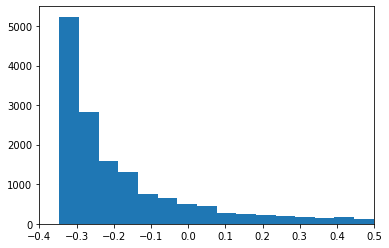

In [216]:
plt.hist(df_standard.Global_Sales, bins=1000)
plt.xlim(-0.4, 0.5)
plt.show()

In [220]:
print(df_standard[df_standard.Global_Sales>0].shape[0] / df_standard.shape[0])  # 평균이 0인데 0 이상인 값이 전체의 22프로밖에 안 됨.
print(df_standard[df_standard.Global_Sales>1].shape[0] / df_standard.shape[0])  # 1 이상인 값은 4프로
print(df_standard[df_standard.Global_Sales>2].shape[0] / df_standard.shape[0])  # 2 이상인 값은 2프로

0.22404405016824716
0.04796573875802998
0.02067910676047721


압도적으로 출고량이 높아서 평균을 높이는 데이터들이 있다.<br>
데이터가 대체로 어떤 경향을 보이는지 살펴보기 위해, 4프로(표준화했을 때 Global_Sales가 1 이상인 데이터)는 제거해서 다시 살펴보자.

In [229]:
drop_index = df_standard[df_standard.Global_Sales>1].index
df_standard_new = df_standard.drop(drop_index).reset_index(drop=True)
# 이상치 제거한 데이터로 다시 표준화
Z = scaler.fit_transform(df_standard_new.select_dtypes(include=['float']))

for i in range(len(sales_include_sum)):
  df_standard_new.loc[:, sales_include_sum[i]] = Z[:, i]
df_standard_new.drop('Cluster', axis=1, inplace=True)
df_standard_new.head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Device_Type
0,Portal 2,X360,2011,Shooter,Valve Software,5.162908,2.834917,-0.284917,2.473949,4.393622,Home
1,Derby Stallion,PS,1997,Sports,ASCII Entertainment,-0.662871,-0.544182,13.467361,1.952995,4.393622,Home
2,Parasite Eve,PS,1998,Role-Playing,SquareSoft,3.220982,-0.080384,7.049631,0.216481,4.393622,Home
3,Need for Speed: Most Wanted 5-1-0,PSP,2005,Racing,Electronic Arts,6.650341,0.317157,-0.214392,2.647600,4.393622,Portable
4,NBA 2K11,X360,2010,Action,Take-Two Interactive,6.939564,0.250900,-0.284917,1.779343,4.393622,Home


In [231]:
df_standard_new.Global_Sales.describe()

count    15561.000000
mean         0.000000
std          1.000032
min         -0.791317
25%         -0.643176
50%         -0.396274
75%          0.220980
max          4.393622
Name: Global_Sales, dtype: float64

여전히 right-skewed되긴 했지만 이전보단 나음.<br>
적어도 75% 분위수가 0보단 큼<br>

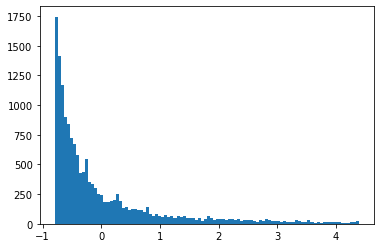

In [233]:
plt.hist(df_standard_new.Global_Sales, bins=100)
plt.show()

2. **연도별 게임의 트렌드가 있을까**

In [71]:
# 장르마다 연도별 합계
group_year = df_clean.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index(level=['Genre']).pivot(columns='Genre', values='Global_Sales')
group_year = group_year.fillna(0)
group_year.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1977,1.25,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0
1978,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,2.53,0.00,0.00,0.0
1980,0.34,1.3,0.77,2.70,0.00,0.00,0.00,0.0,7.07,0.00,0.50,0.0
1981,14.79,0.0,0.00,0.00,6.92,2.25,0.48,0.0,10.02,0.44,0.78,0.0
1982,6.50,0.0,0.00,0.87,5.03,10.04,1.57,0.0,3.81,0.00,1.06,0.0


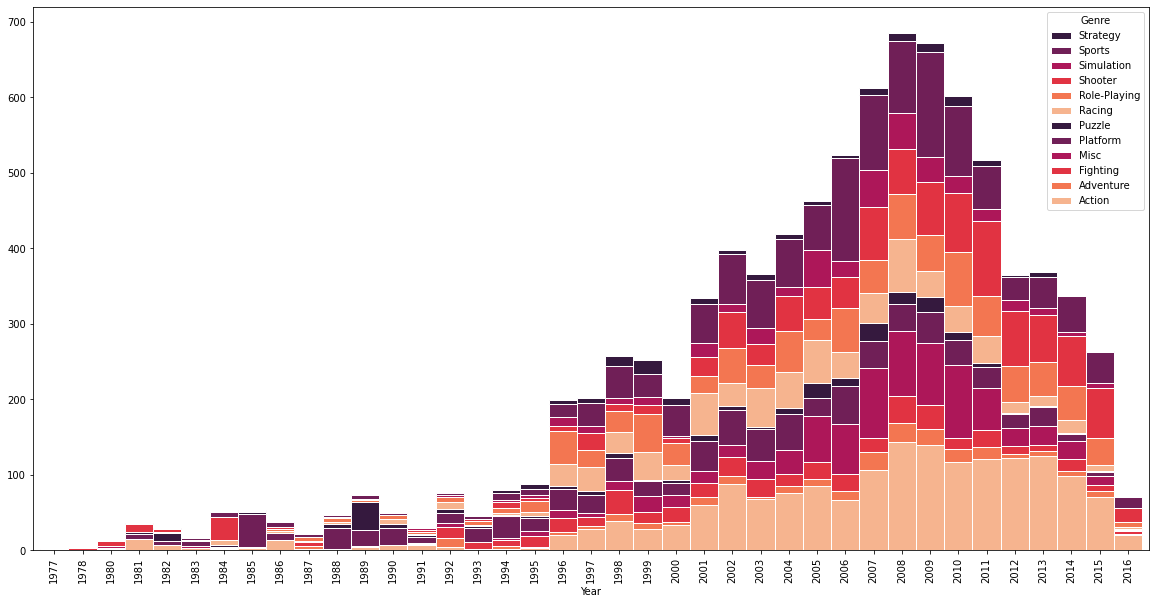

In [72]:
colors_pink = ['#F9CDAC', '#F3ACA2', '#EE8B97', '#E96A8D', '#DB5087', '#B8428C', '#973490', '#742796', '#5E1F88', '#4D1A70', '#3D1459', '#2D0F41'] 
group_year.plot.bar(stacked=True, figsize=(20, 10), color=sns.color_palette('rocket_r'), edgecolor='w', width=1, legend='reverse')
plt.show()

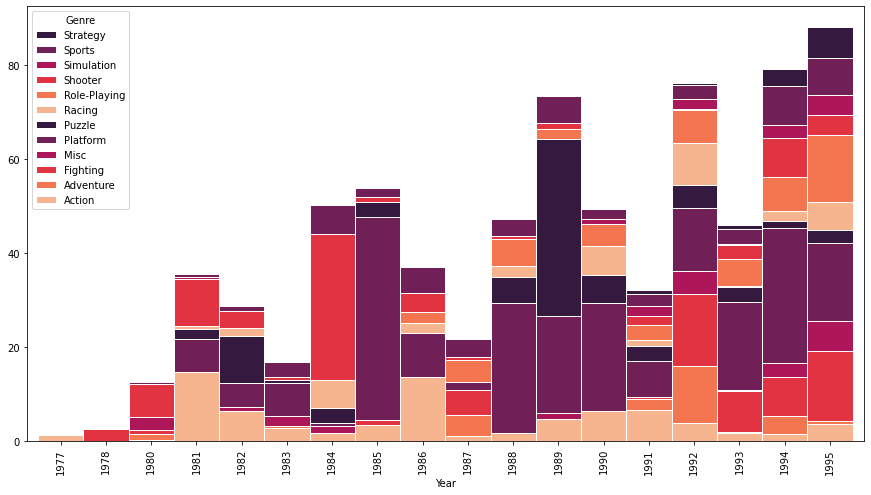

In [73]:
# 1977~2000 까지 잘라서 보기
group_year_past = group_year.iloc[:18]
group_year_past.plot.bar(stacked=True, figsize=(15, 8), color=sns.color_palette('rocket_r'), edgecolor='w', width=1, legend='reverse', title='')
plt.show()

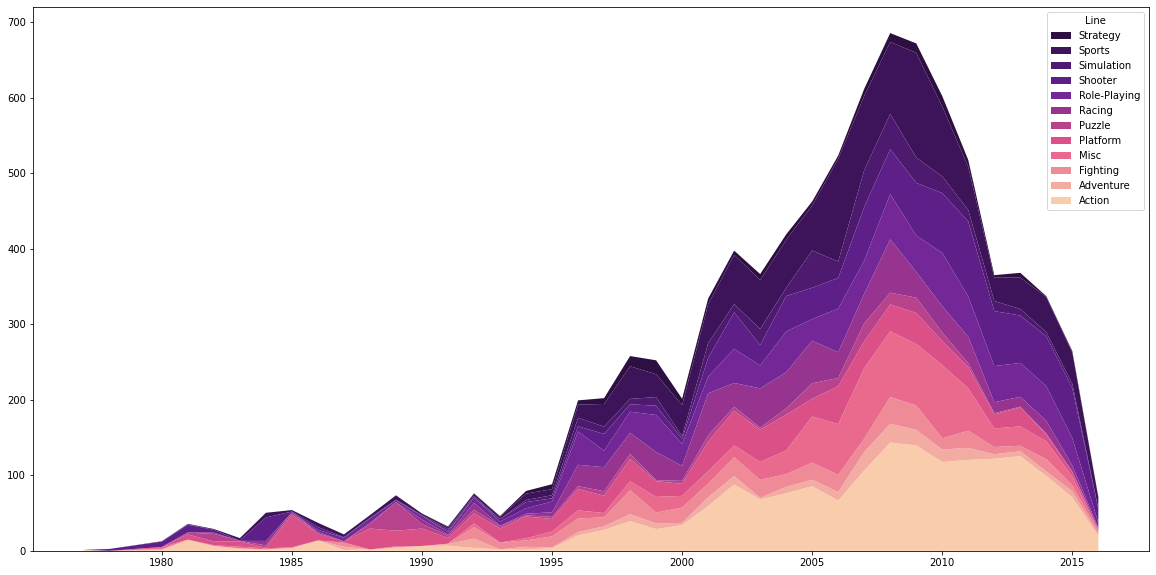

In [74]:
x = list(group_year.index)

y_list = []
for genre in genre_list:
  y_list.append(list(group_year.loc[:, genre]))

fig, ax = plt.subplots(figsize=(20, 10))
ax.stackplot(x, y_list, labels=genre_list, colors=colors_pink)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Line', loc='upper right')
plt.show()

딱히 뭔가 정보가 확 와닿는 형태는 아닌 듯.

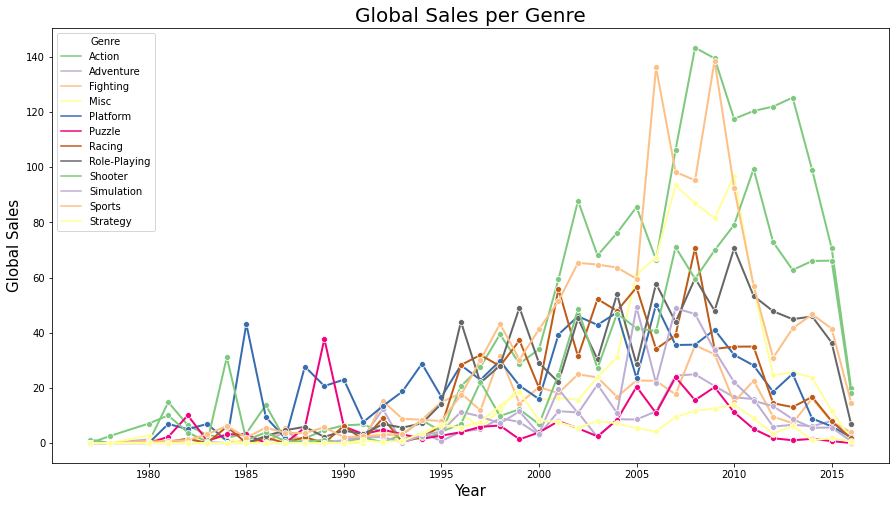

In [75]:
# 꺾은 선 그래프
plt.figure(figsize=(15, 8))
sns.lineplot(data=group_year, palette='Accent', linewidth=2, marker='o', dashes=False)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Global Sales', fontsize=15)
plt.title('Global Sales per Genre', fontsize=20)
plt.legend(title="Genre")
plt.show()

더 별로인듯..<br>
차라리 연도 시기를 적절하게 합하는 건 어떨까?
아니면 sunburst로 보는 것도..

In [79]:
group_year_platform = df_clean.groupby(['Year', 'Platform'])['Global_Sales'].sum().reset_index(level=['Platform']).pivot(columns='Platform', values='Global_Sales')
group_year_platform = group_year_platform.fillna(0)
group_year_platform.head(10)  # 초기에는 Atari 2600밖에 없음

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1977,1.25,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1978,2.53,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1980,12.68,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981,35.68,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1982,28.88,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1983,5.84,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,10.96,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,0.27,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,50.08,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1985,0.45,0.0,0.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.0,53.44,0.0,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1986,0.67,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,36.41,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
group_type = df_clean.groupby(['Year', 'Device_Type'])['Global_Sales'].sum().reset_index(level=['Device_Type']).pivot(columns='Device_Type', values='Global_Sales')
group_type = group_type.fillna(0)

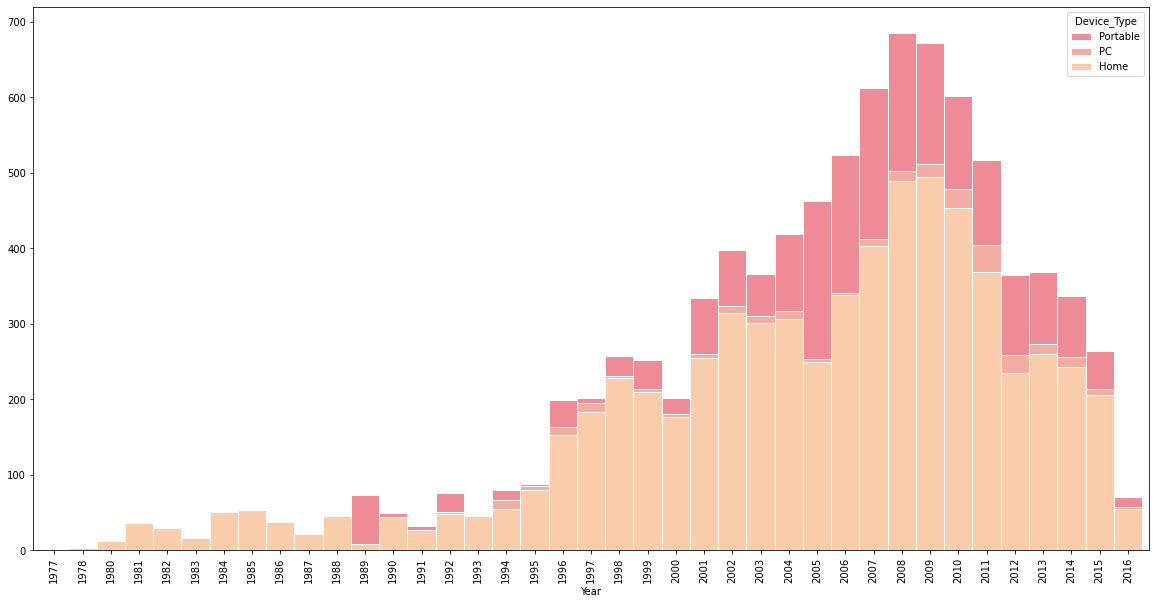

In [81]:
group_type.plot.bar(stacked=True, figsize=(20, 10), color=colors_pink[:3], edgecolor='w', width=1, legend='reverse')
plt.show()

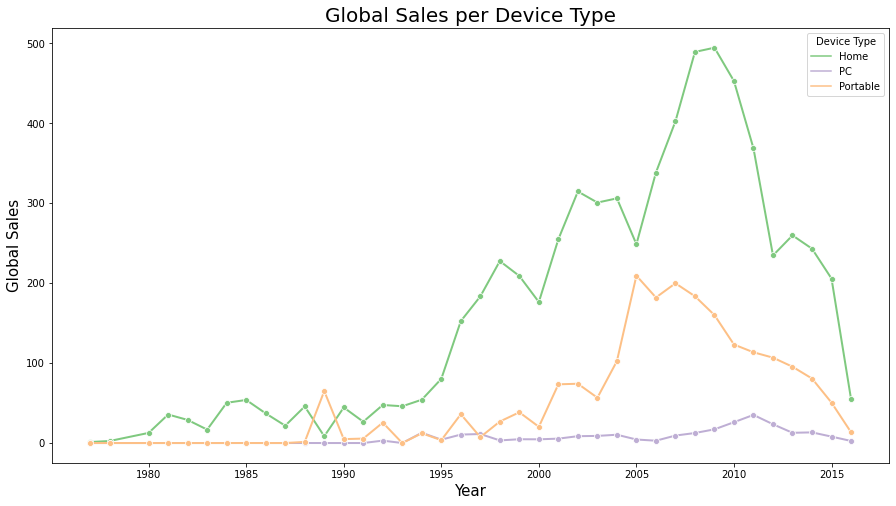

In [82]:
# 위와 같은 추이는 stacked bar보다는 꺾은선 그래프가 더 좋을 것 같다.
plt.figure(figsize=(15, 8))
sns.lineplot(data=group_type, palette='Accent', linewidth=2, marker='o', dashes=False)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Global Sales', fontsize=15)
plt.title('Global Sales per Device Type', fontsize=20)
plt.legend(title="Device Type")
plt.show()

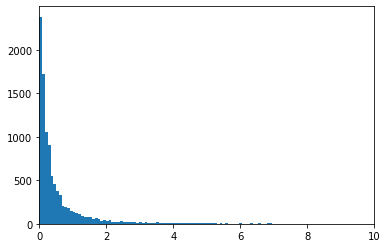

In [83]:
# 하지만 위의 출고량은 단순히 Home(가정용) 게임이 많이 나와서 그런 걸수도 있다. 그것을 방지하기 위해선.. 어떻게 해야하나
# 아예 평균을 내기에는 너무 평균 이하인 게임들이 많지 않을까?
# plt.figure(figsize=(20, 10))
plt.hist(df_clean[df_clean.Device_Type=='Home'].Global_Sales, bins=1000)
plt.xlim((0, 10))
plt.show()


In [84]:
df_clean[df_clean.Device_Type=='Home'].Global_Sales.describe()

count    10099.000000
mean         0.646822
std          1.706700
min          0.000000
25%          0.090000
50%          0.240000
75%          0.610000
max         82.740000
Name: Global_Sales, dtype: float64

In [85]:
df_home = df_clean[df_clean.Device_Type=='Home']
# Global sales가 4 이상인 데이터의 비율
df_home[df_home.Global_Sales>5].shape[0] / df_home.shape[0]

0.014753936033270621

**3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스 포함**


In [86]:
# sunburst
# Name으로 그룹화하기
df_name = df_clean.groupby(['Name', 'Genre', 'Publisher']).sum().sort_values('Global_Sales', ascending=False).reset_index().drop('Year', axis=1)
df_name.sample(10)

,Name,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
8462,Dynasty Warriors DS: Fighter's Battle,Action,Tecmo Koei,0.04,0.00,0.03,0.00,0.07
11368,Art Academy: Home Studio,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01
1359,NBA Live 98,Sports,Electronic Arts,1.41,0.06,0.00,0.04,1.51
11166,Cross Channel: In Memory of All People,Adventure,CyberFront,0.00,0.00,0.02,0.00,0.02
2935,Front Mission,Strategy,SquareSoft,0.00,0.00,0.60,0.00,0.60
9110,Air Conflicts: Aces of World War II,Simulation,Graffiti,0.05,0.00,0.00,0.00,0.05
5245,The Croods: Prehistoric Party!,Misc,D3Publisher,0.08,0.14,0.00,0.02,0.24
241,Dragon Quest IX: Sentinels of the Starry Skies,Role-Playing,Nintendo,0.66,0.69,4.35,0.15,5.85
967,Pokémon Mystery Dungeon: Blue Rescue Team,Role-Playing,Nintendo,1.16,0.06,0.83,0.00,2.05
4593,Hard Hitter Tennis,Sports,Midas Interactive Entertainment,0.15,0.11,0.00,0.04,0.30


In [87]:
# 장르별로 top10만 남겨두기
genre_top10 = pd.DataFrame()
genre = genre_list[0]
temp = df_name[df_name.Genre==genre].sort_values('Global_Sales', ascending=False).iloc[:10, :]
genre_top10 = temp.reset_index(drop=True)

for genre in genre_list[1:]:
  temp = df_name[df_name.Genre==genre].sort_values('Global_Sales', ascending=False).iloc[:10, :]
  genre_top10 = pd.concat([genre_top10, temp], ignore_index=True)
genre_top10 = genre_top10.sort_values('Global_Sales', ascending=False).reset_index(drop=True)
genre_top10.head(10)

,Name,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Grand Theft Auto V,Action,Take-Two Interactive,23.46,23.04,1.39,8.03,55.92
2,Super Mario Bros.,Platform,Nintendo,32.48,4.88,6.96,0.99,45.31
3,Tetris,Puzzle,Nintendo,26.17,2.95,6.03,0.69,35.84
4,Mario Kart Wii,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
5,Wii Sports Resort,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
6,Pokemon Red/Pokemon Blue,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
7,Call of Duty: Black Ops,Shooter,Activision,17.59,9.50,0.59,3.36,31.04
8,Call of Duty: Modern Warfare 3,Shooter,Activision,15.58,11.29,0.62,3.35,30.84
9,New Super Mario Bros.,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01


In [88]:
genre_top10['Title'] = 'Top 10'

In [89]:
fig = px.sunburst(genre_top10, path=['Title', 'Genre', 'Publisher'], values='Global_Sales')
fig.show()

In [90]:
fig = px.sunburst(genre_top10, path=['Title', 'Publisher', 'Genre'], values='Global_Sales', title="Title")

fig.show()

In [91]:
group_publisher = df_name.groupby(['Publisher', 'Name', 'Genre']).sum().sort_values('Global_Sales', ascending=False).reset_index(level=['Publisher', 'Name', 'Genre'])
group_publisher.head(10)

,Publisher,Name,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Nintendo,Wii Sports,Sports,41.49,29.02,3.77,8.46,82.74
1,Take-Two Interactive,Grand Theft Auto V,Action,23.46,23.04,1.39,8.03,55.92
2,Nintendo,Super Mario Bros.,Platform,32.48,4.88,6.96,0.99,45.31
3,Nintendo,Tetris,Puzzle,26.17,2.95,6.03,0.69,35.84
4,Nintendo,Mario Kart Wii,Racing,15.85,12.88,3.79,3.31,35.83
5,Nintendo,Wii Sports Resort,Sports,15.75,11.01,3.28,2.96,33.00
6,Nintendo,Pokemon Red/Pokemon Blue,Role-Playing,11.27,8.89,10.22,1.00,31.38
7,Activision,Call of Duty: Black Ops,Shooter,17.59,9.50,0.59,3.36,31.04
8,Activision,Call of Duty: Modern Warfare 3,Shooter,15.58,11.29,0.62,3.35,30.84
9,Nintendo,New Super Mario Bros.,Platform,11.38,9.23,6.50,2.90,30.01


In [92]:
publisher_sum = group_publisher.groupby(['Publisher']).sum().sort_values('Global_Sales', ascending=False).T
publisher_sum.head(10)

Publisher,Nintendo,Electronic Arts,Activision,Sony Computer Entertainment,Ubisoft,Take-Two Interactive,THQ,Konami Digital Entertainment,Sega,Namco Bandai Games,Microsoft Game Studios,Capcom,Atari,Warner Bros. Interactive Entertainment,Square Enix,Disney Interactive Studios,Eidos Interactive,LucasArts,Bethesda Softworks,Midway Games,Acclaim Entertainment,SquareSoft,Vivendi Games,505 Games,Tecmo Koei,Codemasters,Virgin Interactive,Enix Corporation,Unknown,Deep Silver,GT Interactive,D3Publisher,Sony Computer Entertainment Europe,Hudson Soft,MTV Games,Universal Interactive,Banpresto,Rising Star Games,Infogrames,Majesco Entertainment,Hasbro Interactive,Nippon Ichi Software,989 Studios,Zoo Digital Publishing,Atlus,Level 5,Empire Interactive,ASCII Entertainment,3DO,Crave Entertainment,RedOctane,TDK Mediactive,Mindscape,Global Star,Focus Home Interactive,Fox Interactive,Psygnosis,Activision Value,Interplay,Ignition Entertainment,SouthPeak Games,Spike,Red Orb,Parker Bros.,Tomy Corporation,BAM! Entertainment,Imagic,Zoo Games,Koch Media,Arena Entertainment,City Interactive,Ubisoft Annecy,Nordic Games,Destineer,Play It,PQube,Marvelous Interactive,Palcom,ChunSoft,Idea Factory,Kadokawa Shoten,Game Factory,Gotham Games,Natsume,GSP,Square,Ocean,DTP Entertainment,Sony Online Entertainment,SCi,Mattel Interactive,Takara,Oxygen Interactive,Maxis,Titus,Valve Software,GungHo,Coleco,Human Entertainment,Avanquest,Mojang,Scholastic Inc.,Black Bean Games,Taito,JVC,Sammy Corporation,Midas Interactive Entertainment,Takara Tomy,Telltale Games,Ghostlight,Imagineer,Alchemist,SNK,NCSoft,Rondomedia,Compile,Marvelous Entertainment,Red Storm Entertainment,UEP Systems,Enterbrain,Mastiff,Kemco,Video System,ASC Games,RTL,Little Orbit,Microprose,Jaleco,Nobilis,Agetec,20th Century Fox Video Games,Success,Kalypso Media,Zushi Games,Rocket Company,Metro 3D,System 3 Arcade Software,Valve,Crystal Dynamics,Mastertronic,Hudson Entertainment,Avanquest Software,Accolade,From Software,Xplosiv,5pb,Hello Games,Touchstone,LEGO Media,PopCap Games,Laguna,Westwood Studios,Storm City Games,JoWood Productions,Genki,Arc System Works,Knowledge Adventure,XS Games,Tigervision,Pinnacle,Rage Software,GameMill Entertainment,Slightly Mad Studios,Compile Heart,FuRyu,NewKidCo,Milestone S.r.l.,Aqua Plus,Falcom Corporation,Russel,Playlogic Game Factory,Brash Entertainment,Black Label Games,Gathering of Developers,BMG Interactive Entertainment,Aruze Corp,Sony Computer Entertainment America,Trion Worlds,Jester Interactive,O-Games,Gust,Acquire,Gremlin Interactive Ltd,Mentor Interactive,Epoch,Telegames,Big Ben Interactive,IE Institute,DreamCatcher Interactive,Sunsoft,UFO Interactive,SNK Playmore,Broccoli,Nippon Columbia,Jorudan,Screenlife,CTO SpA,Funbox Media,Victor Interactive,Xseed Games,TalonSoft,Quelle,"Destination Software, Inc","mixi, Inc",Bigben Interactive,Ackkstudios,Mud Duck Productions,Mystique,Conspiracy Entertainment,Square EA,Harmonix Music Systems,NovaLogic,Nihon Falcom Corporation,NEC Interchannel,Men-A-Vision,Pioneer LDC,ArtDink,Gamebridge,Starfish,Quest,Illusion Softworks,Paradox Interactive,Data Age,Media Rings,Sting,Elf,Wanadoo,Aspyr,Seta Corporation,Universal Gamex,Astragon,TDK Core,Foreign Media Games,Wizard Video Games,Prototype,Idea Factory International,ESP,Asylum Entertainment,Nordcurrent,Kadokawa Games,Mumbo Jumbo,AQ Interactive,CPG Products,The Adventure Company,BPS,Answer Software,Hect,Rebellion,Avalon Interactive,Pack In Soft,Activision Blizzard,Swing! Entertainment,Popcorn Arcade,Irem Software Engineering,PlayV,bitComposer Games,Shogakukan,Home Entertainment Suppliers,Angel Studios,NEC,Aksys Games,Electronic Arts Victor,TYO,Tetris Online,Valcon Games,Jack of All Games,NCS,Magical Company,MTO,ValuSoft,P2 Games,Microids,989 Sports,Graffiti,Blast! Entertainment Ltd,Performance Designed Products,Hip Interactive,New,U.S. Gold,ITT Family Games,DSI Games,Magix,Reef Entertainment,Time Warner Interactive,Cave,Benesse,Evolved Games,Indie Games,Starpath Corp.,Hamster Corporation,

In [93]:
publisher_list = list(publisher_sum.columns)

publisher_ratio = publisher_sum.copy()
publisher_ratio['Sum'] = publisher_ratio.sum(axis=1)  # 지역별 Publisher들의 Sales 합계

for region in sales_include_sum:
  publisher_ratio.loc[region, publisher_list] = publisher_ratio.loc[region, publisher_list] / publisher_ratio.loc[region, 'Sum'] * 100

# sales_by_region = publisher_ratio['Sum']  # 지역별 출고량 합계 따로 저장
publisher_ratio = publisher_ratio.drop('Sum', axis=1)

publisher_ratio # 지역별 장르 비율

Publisher,Nintendo,Electronic Arts,Activision,Sony Computer Entertainment,Ubisoft,Take-Two Interactive,THQ,Konami Digital Entertainment,Sega,Namco Bandai Games,Microsoft Game Studios,Capcom,Atari,Warner Bros. Interactive Entertainment,Square Enix,Disney Interactive Studios,Eidos Interactive,LucasArts,Bethesda Softworks,Midway Games,Acclaim Entertainment,SquareSoft,Vivendi Games,505 Games,Tecmo Koei,Codemasters,Virgin Interactive,Enix Corporation,Unknown,Deep Silver,GT Interactive,D3Publisher,Sony Computer Entertainment Europe,Hudson Soft,MTV Games,Universal Interactive,Banpresto,Rising Star Games,Infogrames,Majesco Entertainment,Hasbro Interactive,Nippon Ichi Software,989 Studios,Zoo Digital Publishing,Atlus,Level 5,Empire Interactive,ASCII Entertainment,3DO,Crave Entertainment,RedOctane,TDK Mediactive,Mindscape,Global Star,Focus Home Interactive,Fox Interactive,Psygnosis,Activision Value,Interplay,Ignition Entertainment,SouthPeak Games,Spike,Red Orb,Parker Bros.,Tomy Corporation,BAM! Entertainment,Imagic,Zoo Games,Koch Media,Arena Entertainment,City Interactive,Ubisoft Annecy,Nordic Games,Destineer,Play It,PQube,Marvelous Interactive,Palcom,ChunSoft,Idea Factory,Kadokawa Shoten,Game Factory,Gotham Games,Natsume,GSP,Square,Ocean,DTP Entertainment,Sony Online Entertainment,SCi,Mattel Interactive,Takara,Oxygen Interactive,Maxis,Titus,Valve Software,GungHo,Coleco,Human Entertainment,Avanquest,Mojang,Scholastic Inc.,Black Bean Games,Taito,JVC,Sammy Corporation,Midas Interactive Entertainment,Takara Tomy,Telltale Games,Ghostlight,Imagineer,Alchemist,SNK,NCSoft,Rondomedia,Compile,Marvelous Entertainment,Red Storm Entertainment,UEP Systems,Enterbrain,Mastiff,Kemco,Video System,ASC Games,RTL,Little Orbit,Microprose,Jaleco,Nobilis,Agetec,20th Century Fox Video Games,Success,Kalypso Media,Zushi Games,Rocket Company,Metro 3D,System 3 Arcade Software,Valve,Crystal Dynamics,Mastertronic,Hudson Entertainment,Avanquest Software,Accolade,From Software,Xplosiv,5pb,Hello Games,Touchstone,LEGO Media,PopCap Games,Laguna,Westwood Studios,Storm City Games,JoWood Productions,Genki,Arc System Works,Knowledge Adventure,XS Games,Tigervision,Pinnacle,Rage Software,GameMill Entertainment,Slightly Mad Studios,Compile Heart,FuRyu,NewKidCo,Milestone S.r.l.,Aqua Plus,Falcom Corporation,Russel,Playlogic Game Factory,Brash Entertainment,Black Label Games,Gathering of Developers,BMG Interactive Entertainment,Aruze Corp,Sony Computer Entertainment America,Trion Worlds,Jester Interactive,O-Games,Gust,Acquire,Gremlin Interactive Ltd,Mentor Interactive,Epoch,Telegames,Big Ben Interactive,IE Institute,DreamCatcher Interactive,Sunsoft,UFO Interactive,SNK Playmore,Broccoli,Nippon Columbia,Jorudan,Screenlife,CTO SpA,Funbox Media,Victor Interactive,Xseed Games,TalonSoft,Quelle,"Destination Software, Inc","mixi, Inc",Bigben Interactive,Ackkstudios,Mud Duck Productions,Mystique,Conspiracy Entertainment,Square EA,Harmonix Music Systems,NovaLogic,Nihon Falcom Corporation,NEC Interchannel,Men-A-Vision,Pioneer LDC,ArtDink,Gamebridge,Starfish,Quest,Illusion Softworks,Paradox Interactive,Data Age,Media Rings,Sting,Elf,Wanadoo,Aspyr,Seta Corporation,Universal Gamex,Astragon,TDK Core,Foreign Media Games,Wizard Video Games,Prototype,Idea Factory International,ESP,Asylum Entertainment,Nordcurrent,Kadokawa Games,Mumbo Jumbo,AQ Interactive,CPG Products,The Adventure Company,BPS,Answer Software,Hect,Rebellion,Avalon Interactive,Pack In Soft,Activision Blizzard,Swing! Entertainment,Popcorn Arcade,Irem Software Engineering,PlayV,bitComposer Games,Shogakukan,Home Entertainment Suppliers,Angel Studios,NEC,Aksys Games,Electronic Arts Victor,TYO,Tetris Online,Valcon Games,Jack of All Games,NCS,Magical Company,MTO,ValuSoft,P2 Games,Microids,989 Sports,Graffiti,Blast! Entertainment Ltd,Performance Designed Products,Hip Interactive,New,U.S. Gold,ITT Family Games,DSI Games,Magix,Reef Entertainment,Time Warner Interactive,Cave,Benesse,Evolved Games,Indie Games,Starpath Corp.,Hamster Corporation,

In [94]:
# Global_Sales 기준으로 상위 10개만 남기고 다른 건 다 합치기(더 적으면 일본 특이케이스가 잘 안 보일듯)
publisher_top10 = publisher_list[:10]
publisher_other = publisher_list[10:]

publisher_ratio_clean = publisher_ratio.copy()
publisher_ratio_clean['Other Publishers'] = publisher_ratio_clean.loc[:, publisher_other].sum(axis=1)
publisher_ratio_clean = publisher_ratio_clean.drop(publisher_other,axis=1)
publisher_ratio_clean

Publisher,Nintendo,Electronic Arts,Activision,Sony Computer Entertainment,Ubisoft,Take-Two Interactive,THQ,Konami Digital Entertainment,Sega,Namco Bandai Games,Other Publishers
NA_Sales,18.718632,13.589081,9.807891,6.080810,5.796281,5.054808,4.782660,2.087771,2.494045,1.590475,29.997547
EU_Sales,17.288147,15.314058,8.894551,7.745615,6.732965,4.871209,3.906879,2.841367,3.381970,1.759335,27.263904
JP_Sales,35.415645,1.092551,0.509286,5.770354,0.570806,0.453997,0.390141,7.080948,4.375657,9.877351,34.463264
Other_Sales,12.000655,16.335660,9.484084,10.131814,6.321042,6.956171,4.046425,3.778007,3.062227,1.844898,26.039015
Global_Sales,20.145926,12.495359,8.181680,6.853560,5.341933,4.508134,3.840802,3.168729,3.060272,2.860400,29.543205


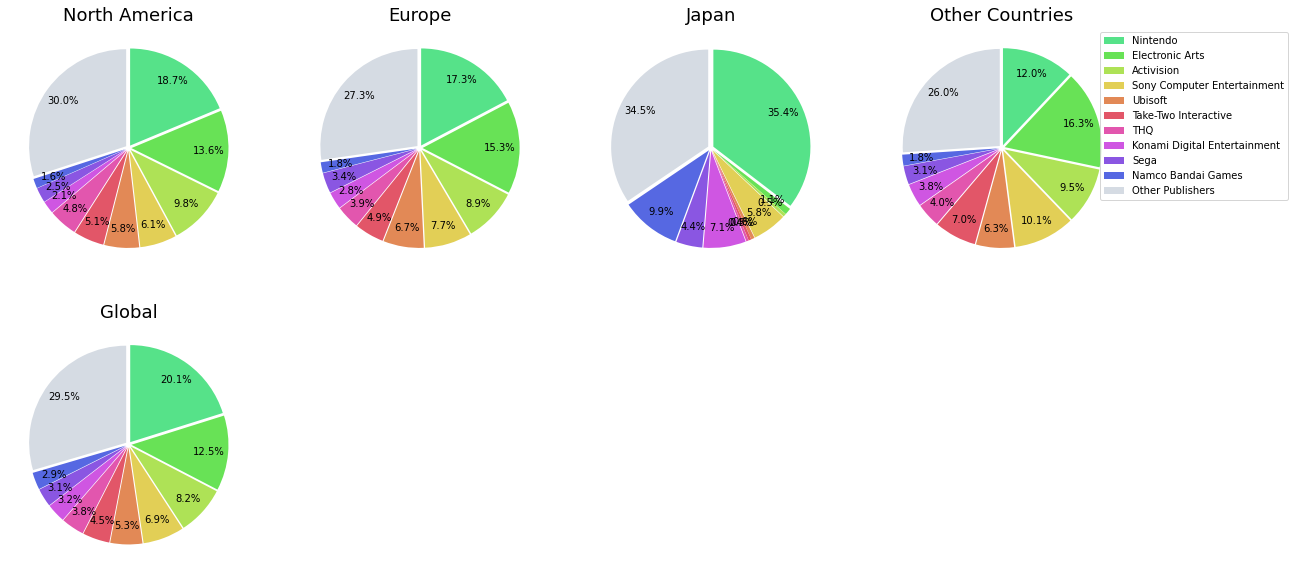

In [95]:
figure, axis = plt.subplots(2, 4, figsize=(20, 10))
publisher_new_list = publisher_top10 + ['Other Publishers']
explode = [0.03] * len(publisher_new_list)
colors_top10_and_others = colors[:10] + ['#D5DBE3']
for i in range(len(sales_include_sum)):  # ['NA', 'EU', 'JP', 'Other', 'Global']
  axis[i//4, i%4].set_title(titles[i], fontsize=18)
  ratio_in_region = list(publisher_ratio_clean.loc[sales_include_sum[i]])
  # (체크) 크기 큰 순서대로 바꾸기
  # for i in range(len(ratio_in_region)):
  #   if ratio_in_region[i] > 10:
  #     explode[i] = 0.1
  axis[i//4, i%4].pie(ratio_in_region, autopct='%.1f%%', startangle=90, counterclock=False, pctdistance=0.8, colors=colors_top10_and_others, explode=explode)
  if i==3:
    axis[i//4, i%4].legend(publisher_new_list,loc='upper right', bbox_to_anchor=(1.7, 1, 0, 0))

figure.delaxes(axis[1,1])
figure.delaxes(axis[1,2])
figure.delaxes(axis[1,3])

plt.show()